# Multiple Type Experiment

In [1]:
import warnings;
warnings.filterwarnings('ignore');

from time import sleep
from tqdm.auto import tqdm

import sys
import importlib
import numpy as np
import nbformat
# import plotly.express
# import plotly.express as px
import pandas as pd
import cvxpy as cp
import scipy.optimize as optimization
import matplotlib.pyplot as plt
import seaborn as sns

### CVXPY Code

In [2]:
def generate_cvxpy_solve(num_types, num_resources):
    x = cp.Variable(shape=(num_types,num_resources))

    sizes = cp.Parameter(num_types, nonneg=True)
    weights = cp.Parameter((num_types, num_resources), nonneg=True)
    budget = cp.Parameter(num_resources, nonneg=True)


    objective = cp.Maximize(cp.log(cp.sum(cp.multiply(x, weights), axis=1)) @ sizes)


    constraints = []
    constraints += [0 <= x]
    for i in range(num_resources):
        constraints += [x[:, i] @ sizes <= budget[i]]
    # constraints += [x @ sizes <= budget]

    prob = cp.Problem(objective, constraints)
    
    def solver(true_sizes, true_weights, true_budget, constraints):
        sizes.value = true_sizes
        weights.value = true_weights
        budget.value = true_budget
        
        prob.solve(solver=cp.MOSEK)
        
        return prob.value, np.around(x.value, 5), constraints
    
    return prob, solver, constraints

### Simple Test

In [20]:
epsi

prob, solver, constraints = generate_cvxpy_solve(2, 2)

val, sol, cons = solver(np.asarray([1., 1.]), np.asarray([[1, epsilon],[2,1]]), np.asarray([1,1]), constraints)
print(sol)

[[0. 1.]
 [1. 0.]]


### Sensitivity of EG Program

In [28]:
eps_list = np.arange(0, 2, 0.01)
# true_weights = np.asarray([[1,1,1],[1,1,1]])
true_budget = np.asarray([1., 1.])


sol_array = np.zeros((len(eps_list), 2))

index = 0
for eps in eps_list:
    # print('Calculating difference in allocations for: ' + str(eps))
    weights = np.asarray([[1, eps],[2,1]])
    sizes = np.asarray([1., 1.])
    
    val, sol, cons = solver(sizes, weights, true_budget, constraints)
    print(sol[0])
    sol_array[index, :] = sol[0]

[0.75001 0.     ]
[0.75 0.  ]
[0.75 0.  ]
[0.75 0.  ]
[0.74999 0.     ]
[0.75001 0.     ]
[0.75001 0.     ]
[0.75 0.  ]
[0.75002 0.     ]
[0.75002 0.     ]
[0.75001 0.     ]
[0.75001 0.     ]
[0.75 0.  ]
[0.75002 0.     ]
[0.75 0.  ]
[0.75001 0.     ]
[0.75001 0.     ]
[0.75 0.  ]
[0.75 0.  ]
[0.75001 0.     ]
[0.75 0.  ]
[0.75 0.  ]
[0.75001 0.     ]
[0.75001 0.     ]
[0.75002 0.     ]
[0.75002 0.     ]
[0.75002 0.     ]
[0.75001 0.     ]
[0.75001 0.     ]
[0.75002 0.     ]
[0.75001 0.     ]
[0.75001 0.     ]
[0.75001 0.     ]
[0.75001 0.     ]
[0.75001 0.     ]
[0.75002 0.     ]
[0.75001 0.     ]
[0.75002 0.     ]
[0.75002 0.     ]
[0.75001 0.     ]
[0.75002 0.     ]
[0.75 0.  ]
[0.74999 0.     ]
[0.75001 0.     ]
[0.75002 0.     ]
[0.75001 0.     ]
[0.75001 0.     ]
[0.75001 0.     ]
[0.75 0.  ]
[0.75001 0.     ]
[0.49684 0.50633]
[0.24501 1.     ]
[0.24001 1.     ]
[0.23501 1.     ]
[0.23001 1.     ]
[0.22501 1.     ]
[0.22001 1.     ]
[0.21501 1.     ]
[0.21001 1.     ]
[0.20501 1

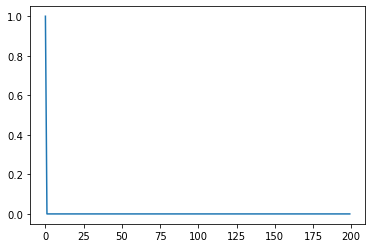

In [26]:
plt.plot(sol_array[:, 1])